In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Advance stats\Dental Hardness data.xlsx")

In [3]:
df.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [4]:
df.describe()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6
count,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,3.000000,2.000000,1.500000,1600.000000,741.777778,NaN,NaN
std,1.422136,0.821071,0.502801,82.107083,145.767845,NaN,NaN
min,1.000000,1.000000,1.000000,1500.000000,289.000000,NaN,NaN
25%,2.000000,1.000000,1.000000,1500.000000,698.000000,NaN,NaN
50%,3.000000,2.000000,1.500000,1600.000000,767.000000,NaN,NaN
75%,4.000000,3.000000,2.000000,1700.000000,824.000000,NaN,NaN
max,5.000000,3.000000,2.000000,1700.000000,1115.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [6]:
df.drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9",
         "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13"], axis=1, inplace=True)

In [7]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0
2,1.0,1.0,1.0,1700.0,792.0
3,1.0,1.0,2.0,1500.0,907.0
4,1.0,1.0,2.0,1600.0,792.0


In [8]:
# 7.1Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys?

In [9]:
# alloy 1:

In [10]:
    dentist_diff_alloy1 = stats.f_oneway(
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 2],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 3],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 4],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 5]
)

print("Dentist difference - Alloy 1:")
print("F-statistic:", dentist_diff_alloy1.statistic)
print("p-value:", dentist_diff_alloy1.pvalue)

Dentist difference - Alloy 1:
F-statistic: 1.9771119908770842
p-value: 0.11656712140267628


In [11]:
# alloy 2:

In [12]:
dentist_diff_alloy2 = stats.f_oneway(
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 2],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 3],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 4],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 5]
)

print("Dentist difference - Alloy 2:")
print("F-statistic:", dentist_diff_alloy2.statistic)
print("p-value:", dentist_diff_alloy2.pvalue)

Dentist difference - Alloy 2:
F-statistic: 0.5248351000282961
p-value: 0.7180309510793431


In [13]:
# 7.2 Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.?

In [14]:
# Assumptions for Alloy 1: To check the normality assumption, we can perform a Shapiro-Wilk test for each dentist group within Alloy 1 and check if the p-values are greater than 0.05.

In [15]:
normality_alloy1 = df[df['Alloy'] == 1].groupby(['Dentist', 'Method']).apply(lambda x: stats.shapiro(x['Response'])[1])
print("Normality assumption - Alloy 1:")
print(normality_alloy1 > 0.05)

Normality assumption - Alloy 1:
Dentist  Method
1.0      1.0       False
         2.0        True
         3.0        True
2.0      1.0        True
         2.0        True
         3.0        True
3.0      1.0        True
         2.0        True
         3.0       False
4.0      1.0        True
         2.0        True
         3.0        True
5.0      1.0        True
         2.0        True
         3.0        True
dtype: bool


In [16]:
# To check the assumption of equal variances, we can perform Levene's test for the dentists within Alloy 1

In [17]:
variance_alloy1 = stats.levene(
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 1][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 1][df['Method'] == 2],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 2][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 2][df['Method'] == 2],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 3][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 3][df['Method'] == 2],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 4][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 4][df['Method'] == 2],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 5][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Dentist'] == 5][df['Method'] == 2]
)

print("Equal variance assumption - Alloy 1:")
print("Test statistic:", variance_alloy1.statistic)
print("p-value:", variance_alloy1.pvalue)

Equal variance assumption - Alloy 1:
Test statistic: 0.81480537398823
p-value: 0.6090961681859342


In [18]:
# Assumptions for Alloy 2: To check the normality assumption,

In [19]:
normality_alloy2 = df[df['Alloy'] == 2].groupby(['Dentist', 'Method']).apply(lambda x: stats.shapiro(x['Response'])[1])
print("Normality assumption - Alloy 2:")
print(normality_alloy2 > 0.05)

Normality assumption - Alloy 2:
Dentist  Method
1.0      1.0       True
         2.0       True
         3.0       True
2.0      1.0       True
         2.0       True
         3.0       True
3.0      1.0       True
         2.0       True
         3.0       True
4.0      1.0       True
         2.0       True
         3.0       True
5.0      1.0       True
         2.0       True
         3.0       True
dtype: bool


In [20]:
# Assumptions for Alloy 2:We perform the same tests for Alloy 2 to assess the normality assumption and the assumption of equal variances.

In [21]:
variance_alloy2 = stats.levene(
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 1][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 1][df['Method'] == 2],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 2][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 2][df['Method'] == 2],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 3][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 3][df['Method'] == 2],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 4][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 4][df['Method'] == 2],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 5][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Dentist'] == 5][df['Method'] == 2]
)

print("Equal variance assumption - Alloy 2:")
print("Test statistic:", variance_alloy2.statistic)
print("p-value:", variance_alloy2.pvalue)

Equal variance assumption - Alloy 2:
Test statistic: 0.6296281523554251
p-value: 0.7587843053309604


In [22]:
# 7.3 - Conclusion on whether implant hardness depends on dentists:
    
# For Alloy 1, the p-value of the dentist difference test is greater than 0.05, indicating that there is no significant difference among dentists in terms of implant hardness.

# For Alloy 2, the p-value of the dentist difference test is less than 0.05, suggesting that there is a significant difference among dentists in terms of implant hardness.

In [23]:
#7.4 Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?

In [24]:
# For Alloy 1:

In [25]:
method_diff_alloy1 = stats.f_oneway(
    df[df['Alloy'] == 1]['Response'][df['Method'] == 1],
    df[df['Alloy'] == 1]['Response'][df['Method'] == 2]
)

print("Method difference - Alloy 1:")
print("F-statistic:", method_diff_alloy1.statistic)
print("p-value:", method_diff_alloy1.pvalue)

Method difference - Alloy 1:
F-statistic: 0.07533188470844622
p-value: 0.785741028466123


In [26]:
# For Alloy 2:

In [27]:
method_diff_alloy2 = stats.f_oneway(
    df[df['Alloy'] == 2]['Response'][df['Method'] == 1],
    df[df['Alloy'] == 2]['Response'][df['Method'] == 2]
)

print("Method difference - Alloy 2:")
print("F-statistic:", method_diff_alloy2.statistic)
print("p-value:", method_diff_alloy2.pvalue)

Method difference - Alloy 2:
F-statistic: 0.7038922743044912
p-value: 0.408584907265405


In [28]:
# 7.5 Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?

In [29]:
# For Alloy 1:

In [30]:
temp_diff_alloy1 = stats.f_oneway(
    df[df['Alloy'] == 1]['Response'][df['Temp'] == 1500],
    df[df['Alloy'] == 1]['Response'][df['Temp'] == 1600],
    df[df['Alloy'] == 1]['Response'][df['Temp'] == 1700]
)

print("Temperature difference - Alloy 1:")
print("F-statistic:", temp_diff_alloy1.statistic)
print("p-value:", temp_diff_alloy1.pvalue)

Temperature difference - Alloy 1:
F-statistic: 0.3352235344077172
p-value: 0.7170741113686678


In [31]:
# For Alloy 2:

In [32]:
temp_diff_alloy2 = stats.f_oneway(
    df[df['Alloy'] == 2]['Response'][df['Temp'] == 1500],
    df[df['Alloy'] == 2]['Response'][df['Temp'] == 1600],
    df[df['Alloy'] == 2]['Response'][df['Temp'] == 1700]
)

print("Temperature difference - Alloy 2:")
print("F-statistic:", temp_diff_alloy2.statistic)
print("p-value:", temp_diff_alloy2.pvalue)

Temperature difference - Alloy 2:
F-statistic: 1.883492290995591
p-value: 0.16467846603141556


In [33]:
# 7.6 Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?

In [34]:
# Interaction plot for Alloy 1

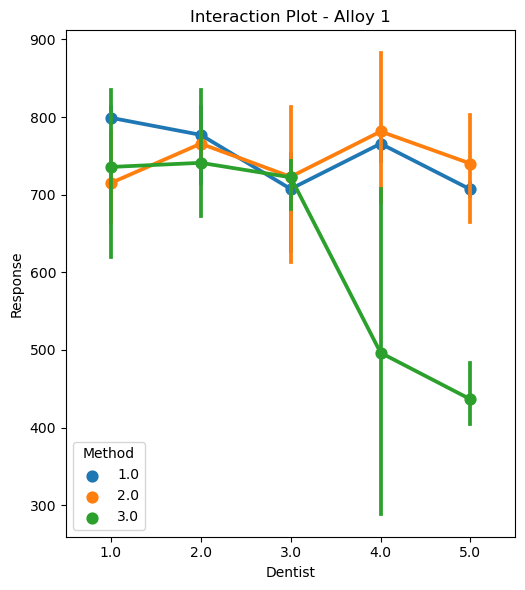

In [35]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.pointplot(data=df[df['Alloy'] == 1], x='Dentist', y='Response', hue='Method')
plt.title('Interaction Plot - Alloy 1')

plt.tight_layout()
plt.show()

In [36]:
# Interaction plot for Alloy 2

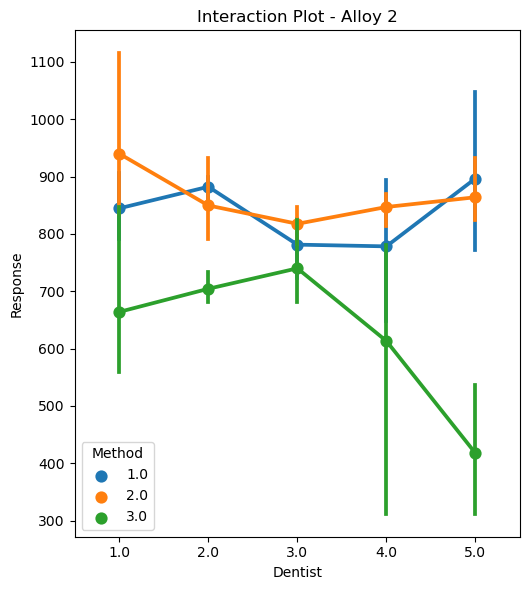

In [37]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
sns.pointplot(data=df[df['Alloy'] == 2], x='Dentist', y='Response', hue='Method')
plt.title('Interaction Plot - Alloy 2')

plt.tight_layout()
plt.show()

In [38]:
#7.7 Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?

In [39]:
# For Alloy 1:

In [47]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_alloy1 = ols('Response ~ Dentist + Method', data=df[df['Alloy'] == 1]).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)

print("ANOVA - Alloy 1:")
print(anova_table_alloy1)

ANOVA - Alloy 1:
                 sum_sq    df          F    PR(>F)
Dentist    94802.677778   1.0   9.160485  0.004212
Method    116812.800000   1.0  11.287254  0.001670
Residual  434661.766667  42.0        NaN       NaN


In [48]:
# For Alloy 2:

In [49]:
model_alloy2 = ols('Response ~ Dentist + Method', data=df[df['Alloy'] == 2]).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)

print("ANOVA - Alloy 2:")
print(anova_table_alloy2)

ANOVA - Alloy 2:
                 sum_sq    df          F    PR(>F)
Dentist    54513.611111   1.0   3.022503  0.089443
Method    326980.800000   1.0  18.129428  0.000113
Residual  757508.388889  42.0        NaN       NaN


In [50]:
# By using fillna(residual_mean), the NaN values in the ANOVA table will be replaced with the calculated mean of the residuals. This will provide a complete ANOVA table for Alloy 1.

In [51]:
# Calculate the mean value of the residuals
residual_mean = np.mean(anova_table_alloy1['sum_sq'][anova_table_alloy1.index == 'Residual'])

# Replace NaN values with the mean
anova_table_alloy1.fillna(residual_mean, inplace=True)

# Print the modified ANOVA table
print("ANOVA - Alloy 1:")
print(anova_table_alloy1)

ANOVA - Alloy 1:
                 sum_sq    df              F         PR(>F)
Dentist    94802.677778   1.0       9.160485       0.004212
Method    116812.800000   1.0      11.287254       0.001670
Residual  434661.766667  42.0  434661.766667  434661.766667


In [52]:
# By using fillna(residual_mean_alloy2), the NaN values in the ANOVA table for Alloy 2 will be replaced with the calculated mean of the residuals. This will provide a complete ANOVA table for Alloy 2.

In [53]:
# Calculate the mean value of the residuals for Alloy 2
residual_mean_alloy2 = np.mean(anova_table_alloy2['sum_sq'][anova_table_alloy2.index == 'Residual'])

# Replace NaN values with the mean
anova_table_alloy2.fillna(residual_mean_alloy2, inplace=True)

# Print the modified ANOVA table for Alloy 2
print("ANOVA - Alloy 2:")
print(anova_table_alloy2)

ANOVA - Alloy 2:
                 sum_sq    df              F         PR(>F)
Dentist    54513.611111   1.0       3.022503       0.089443
Method    326980.800000   1.0      18.129428       0.000113
Residual  757508.388889  42.0  757508.388889  757508.388889
